<a href="https://colab.research.google.com/github/duonghiepit/logistic-regression/blob/main/1_LogReg_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd /content/drive/MyDrive/AIO2023/231006/code - update_1

/content/drive/MyDrive/AIO2023/231006/code - update_1


In [5]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_full.csv',
                     dtype=None,
                     delimiter=',',
                     skip_header=1)
X = iris[:, :4]
y = iris[:, 4]

N = X.shape[0]
# Thay đổi vị trí các sample ngẫu nghiên
indices = np.random.permutation(N)
X = X[indices]
y = y[indices]

In [6]:
intercept = np.ones((N, 1))
X_b = np.c_[intercept, X]

In [7]:
print('X_b', X_b.shape)
print('y', y.shape)
print('N', N)

X_b (100, 5)
y (100,)
N 100


In [23]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def predict(x, theta):
    z = np.dot(x, theta)

    return sigmoid_function(z)

def compute_loss(y_hat, y):
    return -y*np.log(y_hat) - (1-y)*np.log(1 - y_hat)

In [41]:
lr = 0.01
num_iter = 100

theta = np.array([0.1, 0.3, 0.1, 0.2, -0.1])

losses = []
preds = []
accuracies = []

for epoch in range(num_iter):
    for i in range(N):
        xi = X_b[i:i+1]
        yi = y[i:i+1]

        # compute output
        y_hat = predict(xi, theta)

        # compute loss
        loss = compute_loss(y_hat, y)
        losses.append(loss)

        # compute mean of gradient
        gradient = np.dot(xi.T, (y_hat - yi))

        # update
        theta = theta - lr*gradient

In [42]:
losses[0].shape

(100,)

In [43]:
theta

array([-0.3050887 , -0.53680599, -2.04277982,  3.1084402 ,  1.21482173])

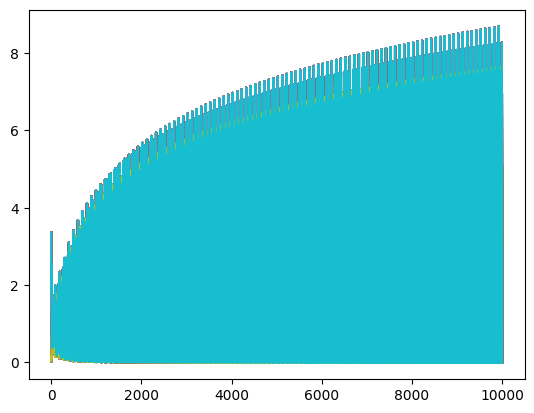

In [44]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [53]:
# compute accuracy
preds = []
for i in range(N):
    xi = X_b[i:i+1]
    yi = y[i: i+1]

    y_hat = predict(xi, theta).round()
    preds.append(y_hat[0])

In [55]:
acc = (preds == y).mean()
print(acc)

1.0
